# Predicting Survival from the Titanic 
___


My attempt to learning and applying data science and machine learning principles to the Titanic: Machine Learning from Disaster dataset!

#### Contents

1. Imports
2. Reading and Exploring Data
3. Analyzing Data
4. Visualizing Data 
5. Cleaning Data
6. Experimenting with Models 
7. Conclusion

___

# 1: Imports
These are the libraries we are using for the dataset

In [2]:
# Data visualization
import matplotlib.pyplot as plt 

# Data manipulation / analysis 
import numpy as np 
import pandas as pd

___

# 2: Reading and Exploring the Dataset
Now we want to explore the dataset using the libraries we imported. We will first read the dataset in.

In [3]:
train = pd.read_csv("./dataset/train.csv")
test = pd.read_csv("./dataset/test.csv")

Now lets exlpore it. We will look only into the training data ```train```

In [4]:
def get_shape(dataset: pd.DataFrame):
    return dataset.shape

get_shape(train)

(891, 12)

This reads " There are ___891___ datapoints, and each of them have ___12___ features being logged.

In [5]:
def get_features(dataset: pd.DataFrame): 
    return list(dataset.columns)

get_features(train)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

These are the 12 features. Now we want to see what kind of data each represent (Categorical or Numerical)

In [6]:
def get_head(dataset: pd.DataFrame, count: int):
    return dataset.head(count)

get_head(train, 5) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Looks like we can deduce the data from the first 5 Rows as the following:

___Categorical Data:___ ```Name```, ```Sex,``` ```Ticket```, ```Cabin```, ```Embarked```

___Numerical Data:___ ```PassengerID```, ```Survived```, ```Pclass```, ```Age```, ```SibSp```, ```Parch```, ```Fare```

In [7]:
def get_dtypes(dataset: pd.DataFrame): 
    return dataset.dtypes

get_dtypes(train)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

These are the datatypes of each feature 

In [8]:
def get_count(dataset: pd.DataFrame): 
    return dataset.count()

get_count(train)

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

These are the number of inputs each feature contains. 

___Important notes___: 
- Age is missing some values 
- Cabin is missing lots of values 
- Embarked is missing very little 

This might lead us for us to fill and drop columns when thinking about our model, but we will do this later on.
___

# 3: Analyzing Data
We want to further look into the dataset.

In [13]:
def describe_dataset(dataset: pd.DataFrame):
    return dataset.describe(include='all')

describe_dataset(train)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


___Some Observations___: 
- There were $577$ males on board the titanic, majority of passengers were those with ```Sex``` of male. 
- The _mean_ for ```Age``` is $26.69$. We might fill this in for the missing values, depending on the distribution (skewed or not)
- Cabin have $147$ unique values, this might seem like an insignificant value for us to use for predicition, but could have a possible correlation with socieconimic class of a passenger. 
- The _mean_ for ```SibSp``` and ```Parch``` is $0.5230$ and $0.3815$, respectively. This could indicate that majority of passengers might have been traveling alone. 
- ```Ticket``` might not have any significance to survival, so we may drop it as well
- Majority of passengers ```Embarked``` from S

___Some Things to Check___: 
- `Pclass` might need to be further evaluated because we know there should be 3 unique labels. First class is represented as a ```1``` Middle Class is represented as a ```2``` and Lower class is represented as a ```3```

- ```Cabin``` and ```Embarked``` needs further analysis to see if any useful information can be extracted 

- ```Age``` we have to check for skewness 

___My Predictions___ 
- Females are more likely to survive than males
- People of higher class are more likely to surivive than those of lower class
- Younger passengers are more likely to survive than older passengers
- Passengers traveling alone were more likely to survive (0 values of ```Sibsp``` and ```Parch```)

___

# 4: Data Visualization
Let's see if my predictions are right!

### 4.1 Prediction 1: _Females are more likely to survive than males_

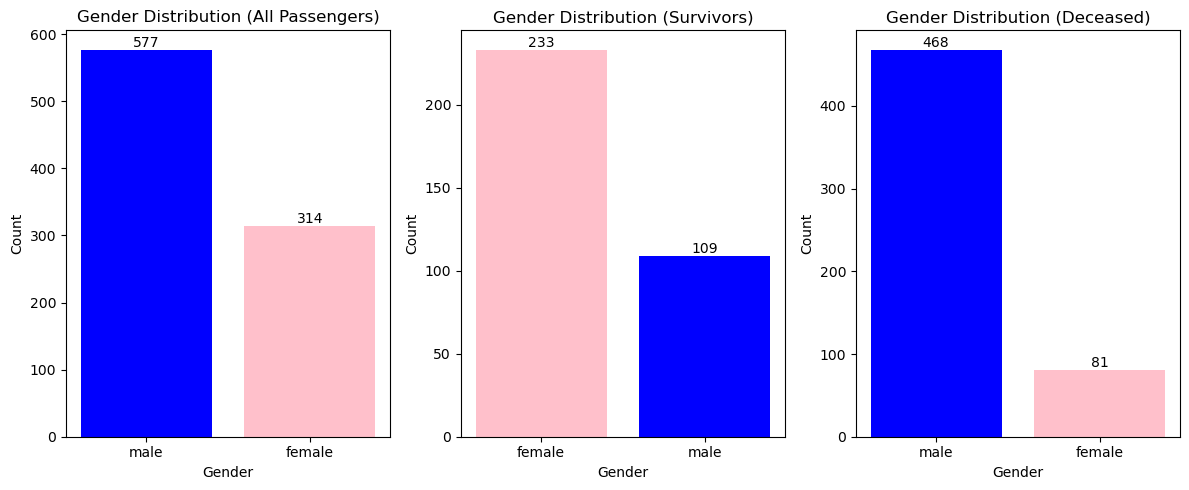

Percentage of passengers that are male and female 
 Sex
male      64.758698
female    35.241302
Name: count, dtype: float64
Percentage of passengers that are male and female who survived 
 Sex
female    68.128655
male      31.871345
Name: count, dtype: float64
Percentage of passengers that are male and female who died
 Sex
male      85.245902
female    14.754098
Name: count, dtype: float64


In [ ]:
def barplot_sex(dataset: pd.DataFrame): 
    passenger_sex_count = dataset["Sex"].value_counts()
    survivor_count = dataset['Sex'][dataset['Survived'] == 1].value_counts()
    deceased_count = dataset['Sex'][dataset['Survived'] == 0].value_counts()

    counts = [passenger_sex_count, survivor_count, deceased_count]
    titles = ["Gender Distribution (All Passengers)", 
              "Gender Distribution (Survivors)", 
              "Gender Distribution (Deceased)"]

    gender_color = {'male': 'blue', 'female': 'pink'}

    fig, ax = plt.subplots(1, 3, figsize=(12, 5))

    for i, count in enumerate(counts):
        bar = ax[i].bar(count.index, count.values, color=[gender_color.get(g, 'gray') for g in count.index])
        ax[i].set_title(titles[i])
        ax[i].set_xlabel('Gender')
        ax[i].set_ylabel('Count')
        ax[i].bar_label(bar)

    plt.tight_layout()
    plt.show()

    passenger_percent = (passenger_sex_count / passenger_sex_count.sum()) * 100
    survivor_percent = (survivor_count / survivor_count.sum()) * 100
    deceased_percent = (deceased_count / deceased_count.sum()) * 100

    print("Percentage of passengers that are male and female \n", passenger_percent)
    print("Percentage of passengers that are male and female who survived \n", survivor_percent)
    print("Percentage of passengers that are male and female who died\n", deceased_percent)

barplot_sex(train)


___Observations___: 
- Plot 1 shows that the majority of passengers were male (which we already knew)
- Plot 2 shows that the majority of passengers who survived were female
- Plot 3 shows that the majority of passengers who died were male

___Stats___:
- $64.75$% of all passengers ($819$) were male
- $68.12$% of all survivors ($342$) were female
- $85.24$% of all deceased ($549$) were male

___Back to the Prediction___ 
- The barplots suggest that my prediction is most likely correct, as we see the majority of survivors were female

### 4.2 Prediction 2: _People of higher class are more likely to surivive than those of lower class_

We are using ```PClass``` to help with determining a passengers socio-economic status. We can use this as a proxy with support of looking into the fare prices of each class.

In [41]:
def fares_and_classes(dataset: pd.DataFrame): 
    return dataset.groupby('Pclass')['Fare'].mean()

fares_and_classes(train)

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

The average price of First class (```1```) is significantly more expensive compared to the average prices of middle (```2```) and lower class (```3```) fares.

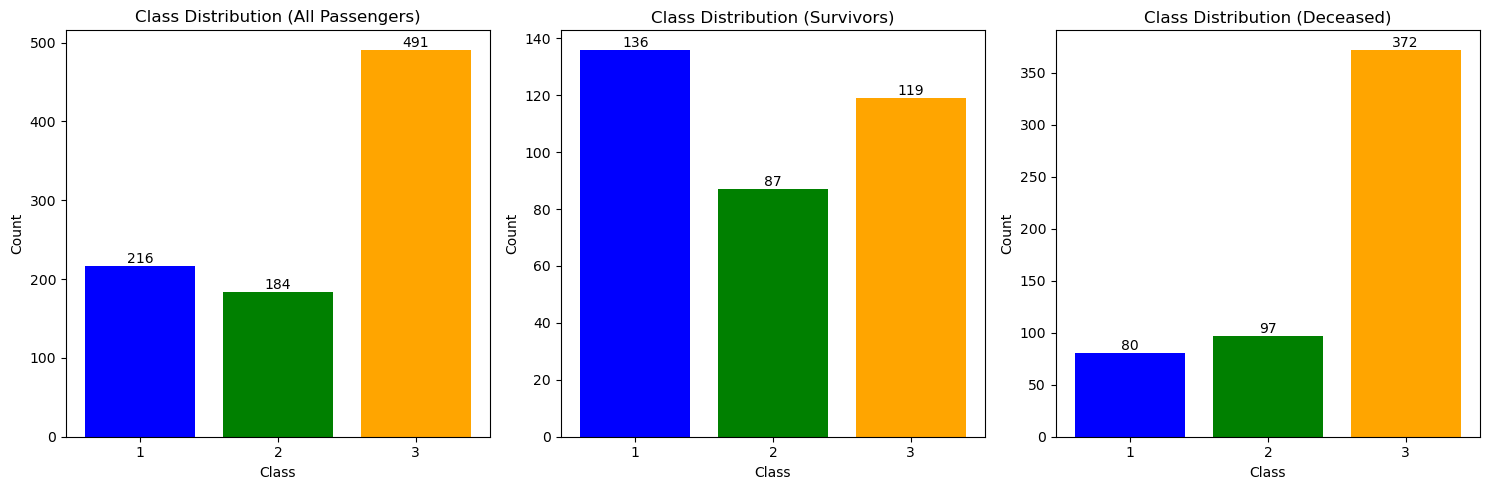

Percentage of passengers that are in classes 1, 2, and 3 
 Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64
Percentage of passengers that are in classes 1, 2, and 3 who survived 
 Pclass
1    39.766082
3    34.795322
2    25.438596
Name: count, dtype: float64
Percentage of passengers that are in classes 1, 2, and 3 who died
 Pclass
3    67.759563
2    17.668488
1    14.571949
Name: count, dtype: float64


In [73]:
def barplot_classes(dataset: pd.DataFrame):
    passenger_count = dataset["Pclass"].value_counts()
    survivor_count = dataset["Pclass"][dataset["Survived"] == 1].value_counts()
    deceased_count = dataset["Pclass"][dataset["Survived"] == 0].value_counts()

    counts = [passenger_count, survivor_count, deceased_count]
    titles = ["Class Distribution (All Passengers)", 
              "Class Distribution (Survivors)", 
              "Class Distribution (Deceased)"]

    class_colors = {1: 'blue', 2: 'green', 3: 'orange'}

    fig, ax = plt.subplots(1, 3, figsize=(15, 5))

    for i, count in enumerate(counts):
        bar = ax[i].bar(count.index, count.values, color=[class_colors.get(c, 'gray') for c in count.index])
        ax[i].set_title(titles[i])
        ax[i].set_xlabel('Class')
        ax[i].set_ylabel('Count')
        ax[i].set_xticks([1, 2, 3])
        ax[i].set_xticklabels(['1', '2', '3'])
        ax[i].bar_label(bar)

    plt.tight_layout()
    plt.show()

    passenger_percent = (passenger_count / passenger_count.sum()) * 100
    survivor_percent = (survivor_count / survivor_count.sum()) * 100
    deceased_percent = (deceased_count / deceased_count.sum()) * 100

    print("Percentage of passengers that are in classes 1, 2, and 3 \n", passenger_percent)
    print("Percentage of passengers that are in classes 1, 2, and 3 who survived \n", survivor_percent)
    print("Percentage of passengers that are in classes 1, 2, and 3 who died\n", deceased_percent)


barplot_classes(train)


___Observations___:
- Majority of passengers belonged in the lower class ($491$)
- Majority of survivors belonged in the upper class ($136$)
- Majority of deceased passengers belonged in the lower class ($372$)
- The difference of survivors between the upper class and the lower class is only $17$ passengers

So far, it looks like my prediction is likely correct, but the distrubution of survivors between the lower and upper class makes it questionable. However, lets dive deeper into these proportions

In [71]:
def class_proportions(dataset : pd.DataFrame): 
    passenger_count = dataset["Pclass"].value_counts()
    survivor_count = dataset["Pclass"][dataset["Survived"] == 1].value_counts()
    deceased_count = dataset["Pclass"][dataset["Survived"] == 0].value_counts()
    
    for class_number in [1, 2, 3]:
        total_passengers = passenger_count.get(class_number, 0)
        survivors = survivor_count.get(class_number, 0)
        deceased = deceased_count.get(class_number, 0)
        print(f"Class {class_number} ({total_passengers}):")
        print(f"  Survivor Percentage: {round((survivors / total_passengers) * 100, 2) if total_passengers > 0 else 0}%")
        print(f"  Deceased Percentage: {round((deceased / total_passengers) * 100, 2) if total_passengers > 0 else 0}%")

class_proportions(train)
    

Class 1 (216):
  Survivor Percentage: 62.96%
  Deceased Percentage: 37.04%
Class 2 (184):
  Survivor Percentage: 47.28%
  Deceased Percentage: 52.72%
Class 3 (491):
  Survivor Percentage: 24.24%
  Deceased Percentage: 75.76%


___Stats___:
- $62.96$% of passengers in class 1 survived 
- $75.76$% of passengers in class 3 died

While the absolute survivor counts between Class 1 ($136$) and Class 3 ($119$) were close, the survival percentages tell us that:
- A passenger in Class 1 was far more likely to survive ($62.96$%) compared to a passenger in Class 3 ($24.24$%).
- This suggests that higher socio-economic status (Class 1) significantly increased the chances of survival.

Note: The higher survival rate could reflect on the passengers access to lifeboats and other resources. Class 1 may have had that advantage compared to class 2 and 3